In [1]:
# Bagged Decision Trees for Classification
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier


df = read_csv('/content/Fraud_check.csv')


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [8]:
df.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [3]:
df.describe()

,Taxable.Income,City.Population,Work.Experience
count,600.000000,600.000000,600.000000
mean,55208.375000,108747.368333,15.558333
std,26204.827597,49850.075134,8.842147
min,10003.000000,25779.000000,0.000000
25%,32871.500000,66966.750000,8.000000
50%,55074.500000,106493.500000,15.000000
75%,78611.750000,150114.250000,24.000000
max,99619.000000,199778.000000,30.000000


In [4]:
df.isnull().any()

Undergrad          False
Marital.Status     False
Taxable.Income     False
City.Population    False
Work.Experience    False
Urban              False
dtype: bool

In [5]:
df.duplicated().any()

False

In [6]:
import seaborn as sns
corr = df.corr()
corr

<ipython-input-6-26e26d4e374d>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


,Taxable.Income,City.Population,Work.Experience
Taxable.Income,1.000000,-0.064387,-0.001818
City.Population,-0.064387,1.000000,0.013135
Work.Experience,-0.001818,0.013135,1.000000


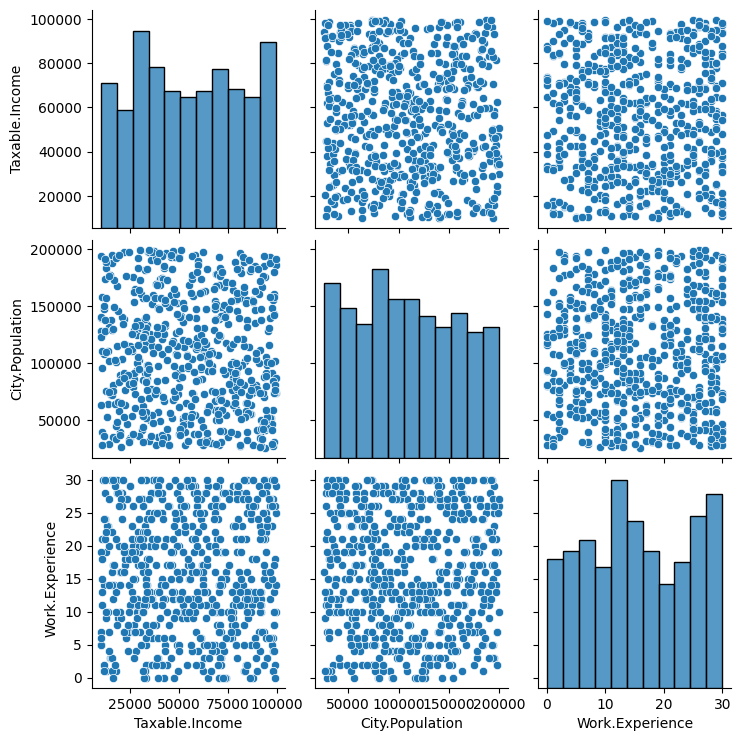

In [7]:
sns.pairplot(df)

In [9]:
df['Undergrad'] = df['Undergrad'].astype('category')
df['Marital.Status'] = df['Marital.Status'].astype('category')
df['Urban'] = df['Urban'].astype('category')

In [10]:
df.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [11]:
#Complete dataset
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
df['Undergrad']= label_encoder.fit_transform(df['Undergrad'])
df['Urban']= label_encoder.fit_transform(df['Urban'])
df['Marital.Status']= label_encoder.fit_transform(df['Marital.Status'])

In [12]:
df.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,0,2,68833,50047,10,1
1,1,0,33700,134075,18,1
2,0,1,36925,160205,30,1
3,1,2,50190,193264,15,1
4,0,1,81002,27533,28,0


In [13]:
df['Risky'] = df['Taxable.Income'].map(lambda x: 1 if x <= 30000 else 0)# 0 is good and 1 is Risky

In [14]:
df['Risky'].unique()

array([0, 1])

In [15]:
x=df.iloc[:,0:6]
y=df['Risky']

In [16]:
x

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,0,2,68833,50047,10,1
1,1,0,33700,134075,18,1
2,0,1,36925,160205,30,1
3,1,2,50190,193264,15,1
4,0,1,81002,27533,28,0
...,...,...,...,...,...,...
595,1,0,76340,39492,7,1
596,1,0,69967,55369,2,1
597,0,0,47334,154058,0,1
598,1,1,98592,180083,17,0


In [17]:
y

0      0
1      0
2      0
3      0
4      0
      ..
595    0
596    0
597    0
598    0
599    0
Name: Risky, Length: 600, dtype: int64

In [18]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state= 42)

In [19]:
kfold = KFold(n_splits=10, random_state=None)
cart = DecisionTreeClassifier()
num_trees = 100
model = BaggingClassifier(estimator=cart, n_estimators=num_trees, random_state=None)
results = cross_val_score(model, x_train, y_train, cv=kfold)
print(results.mean())

0.9958333333333332


In [20]:
# Random Forest Classification
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier


num_trees = 100
max_features = 3
kfold = KFold(n_splits=10, random_state=None)
model1 = RandomForestClassifier(n_estimators=num_trees, max_features=max_features)
results1 = cross_val_score(model1, x_train, y_train, cv=kfold)
print(results1.mean())

0.9958333333333332


In [21]:
col = df.columns.tolist()
col

['Undergrad',
 'Marital.Status',
 'Taxable.Income',
 'City.Population',
 'Work.Experience',
 'Urban',
 'Risky']

In [23]:
model1.fit(x,y)

RandomForestClassifier(max_features=3)

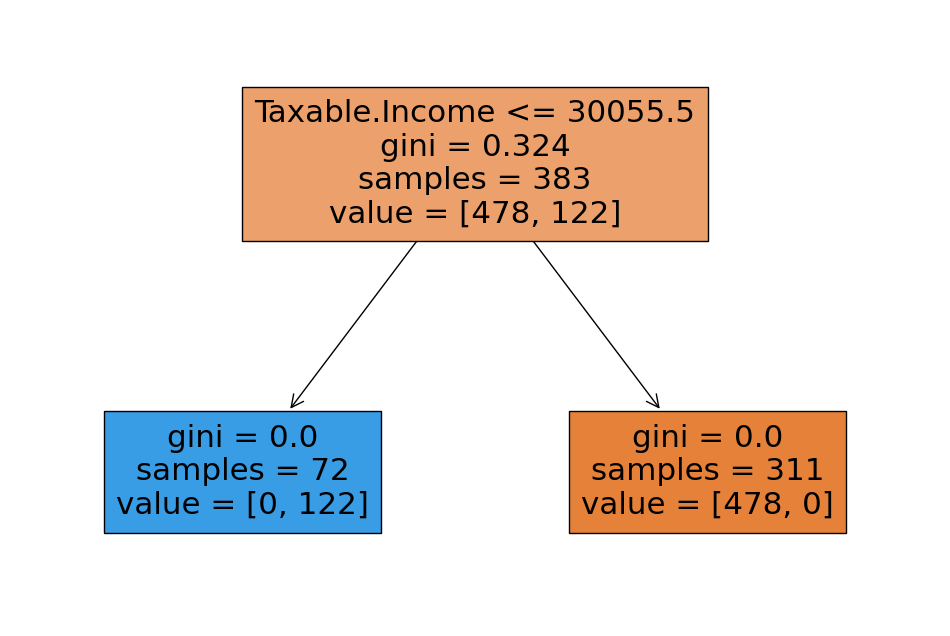

In [24]:
# Choose a tree index to plot (you can choose any tree in the forest)
tree_index = 0
from sklearn.tree import plot_tree
# Plot the selected tree
plt.figure(figsize=(12, 8))
plot_tree(model1.estimators_[tree_index], feature_names=col, filled=True)
plt.show()

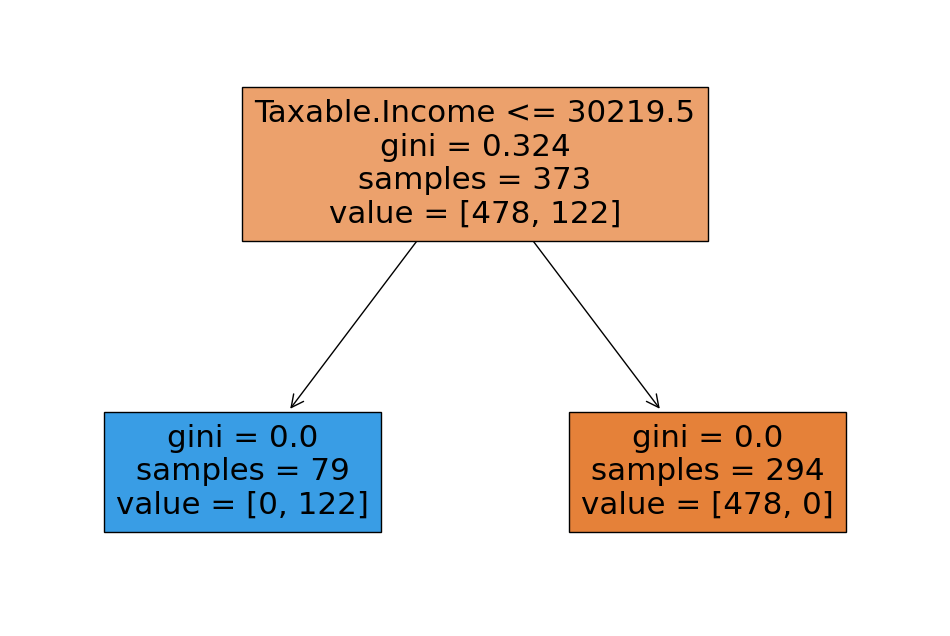

In [25]:
# Choose a tree index to plot (you can choose any tree in the forest)
tree_index1 = 5
from sklearn.tree import plot_tree
# Plot the selected tree
plt.figure(figsize=(12, 8))
plot_tree(model1.estimators_[tree_index1], feature_names=col, filled=True)
plt.show()

In [26]:
# AdaBoost Classification

from sklearn.ensemble import AdaBoostClassifier
num_trees = 10
seed=7
kfold = KFold(n_splits=10, random_state=None)
model2 = AdaBoostClassifier(n_estimators=num_trees, random_state=None)
results2 = cross_val_score(model2, x_train, y_train, cv=kfold)
print(results2.mean())


0.9958333333333332


In [28]:
model2.fit(x,y)

AdaBoostClassifier(n_estimators=10)

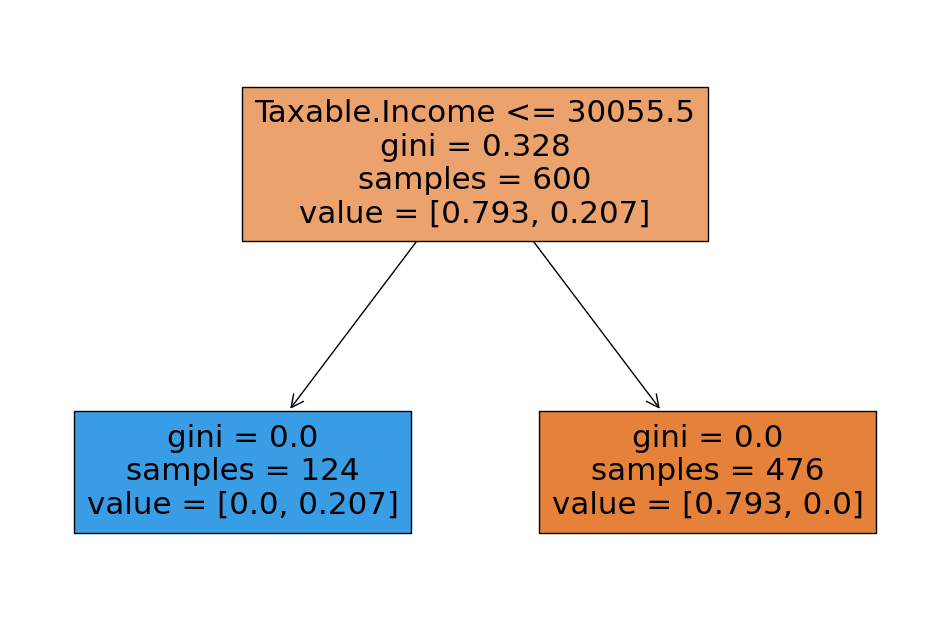

In [30]:
# Choose a tree index to plot (you can choose any tree in the forest)
tree_index1 = 0
from sklearn.tree import plot_tree
# Plot the selected tree
plt.figure(figsize=(12, 8))
plot_tree(model2.estimators_[tree_index1], feature_names=col, filled=True)
plt.show()

In [31]:
# Stacking Ensemble for Classification
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier

kfold = KFold(n_splits=10, random_state=None)

# create the sub models
estimators = []
model = LogisticRegression(max_iter=500)
estimators.append(('logistic', model))
model1 = DecisionTreeClassifier()
estimators.append(('cart', model1))
model2 = SVC()
estimators.append(('svm', model2))

# create the ensemble model
ensemble = VotingClassifier(estimators)
results_final = cross_val_score(ensemble, x_train, y_train, cv=kfold)
print(results_final.mean())

0.9854166666666666
